# The "SPARKS FOUNDATION"- GRIP
## Data Science and Business Analytics - SEPT'2022
### BY- IQBAL RAIS

## TASK 1 : Prediction using supervised ML

### DATA SET USED

- STUDENT SCORES

### PROBLEM STATEMENT

- Predict the percentage of a student based on the no. of study hours.
- What will be predicted score if a student studies for **9.25 hrs/ day**

# Importing libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Understanding

In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

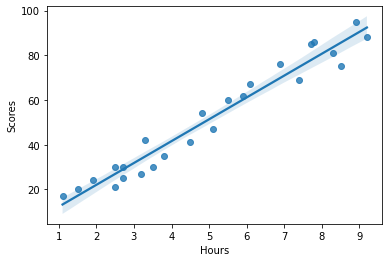

In [8]:
sns.regplot(x='Hours', y= 'Scores', data=df)
plt.show()

### Creating X and y

In [13]:
X = df[['Hours']]
y = df['Scores']

### Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.70, random_state= 15)

In [30]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(X.shape)
print(y.shape)

(25, 2)
(17, 1)
(8, 1)
(25, 1)
(25,)


# Building a Linear Model

In [32]:
lr = LinearRegression()

lr_model = lr.fit(X_train, y_train)

In [33]:
print(lr_model.coef_)
print(lr_model.intercept_)

[10.0339202]
2.253936022900504


### Score = 10.034 + 2.254 x Hours

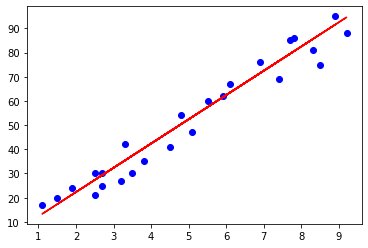

In [38]:
# Plot the regression line

l = lr_model.coef_*X+lr_model.intercept_

# Plotting for the test data

plt.scatter(X, y, color='blue')
plt.plot(X, l, color='red')
plt.show()

In [42]:
y_train_pred = lr_model.predict(X_train)

# Predictions on the Test Set

In [40]:
y_pred = lr_model.predict(X_test)

In [41]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df.head()


,Actual,Predicted
16,30,27.338737
22,35,40.382833
2,27,34.362481
1,47,53.426929
6,88,94.566002


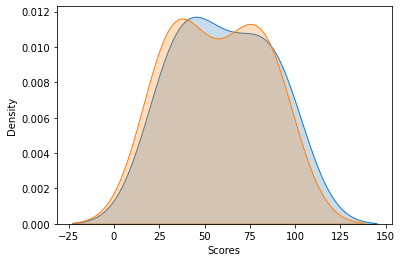

In [56]:
# Distributions of Actual vs Predicted values

sns.kdeplot(data = y_pred,label="Predicted", shade=True);

sns.kdeplot(data= y_test, label="Actual", shade=True);

In [45]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Evaluating the model

### Looking at the RMSE

In [46]:
# Returns the mean squared error; we'll take a square root

np.sqrt(mean_squared_error(y_test, y_pred))

6.842529140021155

### Checking the R-squared on the test set

In [49]:
r_squared_test = r2_score(y_test, y_pred)
r_squared_test

0.9156178896102483

### Checking the R-squared on the train set

In [52]:
r_squared_train = r2_score(y_train, y_train_pred)
r_squared_train

0.963463940377195

In [53]:
h = pd.DataFrame([9.25])
s = lr_model.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  95.06769784842383
